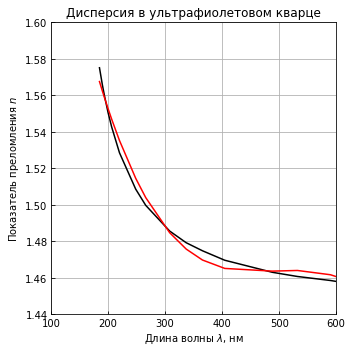

In [22]:
def n(l):
    a0 = 1.8985792312887
    a1 = -2.6702096343795e-03
    a2 = 5.4382539791070e-06
    a3 = -3.6739868937902e-09
    return a3*l**3+a2*l**2+a1*l+a0

import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
data = np.loadtxt("disper", delimiter='\t', dtype=np.float)
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title(label="Дисперсия в ультрафиолетовом кварце")
ax.plot(data.T[0], data.T[1], 'black', data.T[0], n(data.T[0]), 'red')
#ax.plot(data.T[0], n(data.T[0]/const.physical_constants['Planck constant in eV s']/6.28), 'red')
ax.set_xlim(left=100, right=600)
ax.set_ylim(bottom=1.44, top=1.60)
ax.set_xlabel('Длина волны $\lambda$, нм')
ax.set_ylabel('Показатель преломления $n$')
ax.grid(True)
ax.tick_params(direction = 'in')
fig.tight_layout()
plt.savefig("disp.png")

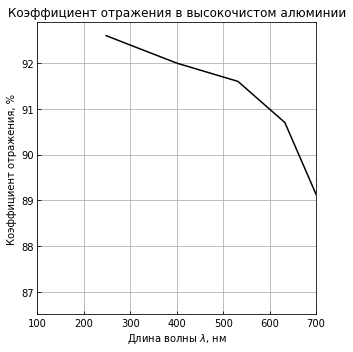

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data2 = np.loadtxt("reflectance_data")
fig, ax2 = plt.subplots(figsize=(5,5))

ax2.set_title(label="Коэффициент отражения в высокочистом алюминии")
ax2.plot(data2.T[0], data2.T[1], 'k')
ax2.grid(True)
ax2.set_xlabel("Длина волны $\lambda$, нм")
ax2.set_ylabel("Коэффициент отражения, %")
ax2.set_xlim(left=100, right=700)
ax2.tick_params(direction='in')
fig.tight_layout()

![График дисперсии](disp.png)

![](al_refl.gif)
Минимум отражения $-$ 84% при угле Брюстера $\theta = 81.7^{\circ}$
![График коэффициента отражения](reflectance.png)
$$E = \frac{mc^2}{\sqrt{1-{\beta}^2}}$$
$$\beta = \frac{\sqrt{E^2-m^2c^4}}{E}$$
$$cos \theta = \frac{1}{\beta n}$$

Учитывая то, что $m^2c^4 \ll E^2$, можно разложить числитель $\beta$ в ряд Тейлора и получить следующее:
$$\beta \approx 1-\frac{m^2c^4}{2E^2}$$

$$\theta = \arccos \frac{1}{\left(1-\frac{m^2c^4}{2E^2}\right)n},$$
где $mc^2=0,511$*МэВ* $-$ масса покоя электрона.

In [3]:
import numpy as np
import scipy.constants as const
import matplotlib.pyplot as plt

#def n(L):
#    l = L / 100
#    a0 = 2.104
#    a1 = -1.45e-4
#    a2 = -9.05e-3
#    a3 = 8.801e-3
#    a4 = 8.435e-5
#    a5 = 1.68e-6
#    a6 = -167e-8
#    a7 = 8.33e-10
#    #a0 = 1.65
    #a1 = -9.26e-4
    #a2 = 1.56e-6
    #a3 = -9.07e-10

#    return a1*l**4+a2*l**2+a3*l**(-2)+a4*l**(-4)+a5*l**(-6)+a6*l**(-8)+a7*l**(-10)+a0

def n(l):
    a0 = 1.8985792312887
    a1 = -2.6702096343795e-03
    a2 = 5.4382539791070e-06
    a3 = -3.6739868937902e-09
    return a3*l**3+a2*l**2+a1*l+a0

def EtoL(E):
    return const.physical_constants['Planck constant in eV s'][0]*const.physical_constants['speed of light in vacuum'][0]/E

def beta(E):
    return (1 - 0.5*((const.physical_constants['electron mass energy equivalent in MeV'][0]/(E)) ** 2))

def angle(E):
    return np.arccos(1/(beta(E) * n(400)))

enrange = np.arange(1, 13, 0.1)
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('Угол раствора конуса от энергии')
ax.plot(enrange, np.degrees(angle(enrange)), 'black', enrange, 43*beta(enrange), 'blue')
ax.set_xlim(left=0, right=13)
ax.set_xlabel('Энергия, МэВ')
ax.set_ylabel("Угол $theta$")
ax.grid(True)
ax.tick_params(direction = 'in')
fig.tight_layout()
beta(3)

0.985493337615816

$N = 2\pi\alpha l Z^2 \left( \frac{1}{\lambda_2} - \frac{1}{\lambda_1} \right) \left( 1 - \frac{1}{\beta^2 n^2} \right)= 2\pi\alpha l Z^2 \left( \frac{1}{\lambda_2} - \frac{1}{\lambda_1} \right) \sin^2 \theta$ -- число фотонов, испускаемое черенковской частицей на длине $l$. На 2 см радиатора из КУ-1 (или аналогичного ему Corning 7980) в интервале волн от 200 нм до 500 нм при пролёте электрона энергии в 3 МэВ средой будет испущено 1400 фотонов.

Сам по себе электрон будет тормозить. За радиационную длину он испустит $N = \frac{4}{3}\ln \frac{\lambda_2}{\lambda_1}$, то есть $\approx 1$ фотон, что не имеет большого значения, так как длина радиатора гораздо меньше. Вообще пробег электрона с энергией больше 1 МэВ в веществе должен составить от 0,4 до 5,4 $\frac{г}{см^2}$, в нашем случае длина равна 4,4 $\frac{г}{см^2}$.

In [33]:
print((10**7/200 - 10**7/500)*0.7208306429990985**2*2*2*3.14/137)

1429.080877562269
